In [114]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display

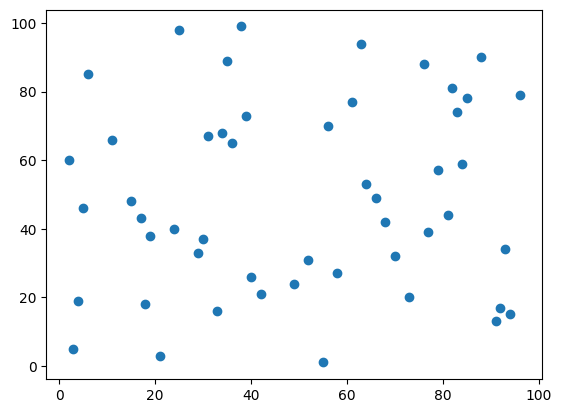

In [115]:
# generate data
x = random.sample(range(1, 100), 50)
y = random.sample(range(1, 100), 50)
data = np.zeros((50,2))
data[:,0] = x
data[:,1] = y
plt.scatter(x,y)

In [118]:
def k_means(data, num_iter, threshold=0.00001):
    m = len(data)  # Number of data points
    clustered_data = np.zeros((m, 3))  # Data points with cluster number
    prev_cost = np.inf

    # Initialize centroids once
    c1, c2, c3, c4 = random.sample(list(data), 4)

    final_clustered_data = None  # To store the final clustered data
    final_centroids = None  # To store final centroids

    for i in range(num_iter):
        display.clear_output(wait=True)
        plt.figure()

        i_cost = 0  # Initial cost for each iteration

        # Assign each point to a centroid
        for idx, point in enumerate(data):
            dist1 = np.linalg.norm(point - c1)
            dist2 = np.linalg.norm(point - c2)
            dist3 = np.linalg.norm(point - c3)
            dist4 = np.linalg.norm(point - c4)

            dist_min = min(dist1, dist2, dist3, dist4)
            clustered_data[idx, 0:2] = point

            if dist_min == dist1:
                clustered_data[idx, 2] = 1
            elif dist_min == dist2:
                clustered_data[idx, 2] = 2
            elif dist_min == dist3:
                clustered_data[idx, 2] = 3
            elif dist_min == dist4:
                clustered_data[idx, 2] = 4

            i_cost += dist_min

        # Update centroids to mean of their clusters
        c1 = np.mean(clustered_data[clustered_data[:, 2] == 1][:, 0:2], axis=0)
        c2 = np.mean(clustered_data[clustered_data[:, 2] == 2][:, 0:2], axis=0)
        c3 = np.mean(clustered_data[clustered_data[:, 2] == 3][:, 0:2], axis=0)
        c4 = np.mean(clustered_data[clustered_data[:, 2] == 4][:, 0:2], axis=0)

        cost = i_cost / m  # Corrected cost computation

        # Check for convergence
        if abs(prev_cost - cost) < threshold:
            break
        prev_cost = cost

        # Store final data for last plot
        final_clustered_data = clustered_data.copy()
        final_centroids = np.array([c1, c2, c3, c4])

        # Plot the clusters
        plt.scatter(clustered_data[:, 0], clustered_data[:, 1], c=clustered_data[:, 2])
        plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker="x", color="red", s=100)  # Plot centroids
        plt.title(f'Iteration {i + 1}, Cost: {cost:.2f}')
        display.display(plt.gcf())
        plt.close()

    # Final plot after loop ends
    plt.figure()
    plt.scatter(final_clustered_data[:, 0], final_clustered_data[:, 1], c=final_clustered_data[:, 2])
    plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker="x", color="red", s=100)  # Plot centroids
    plt.title(f'Final Iteration {i + 1}, Cost: {prev_cost:.2f}')
    plt.show()


<Figure size 640x480 with 0 Axes>

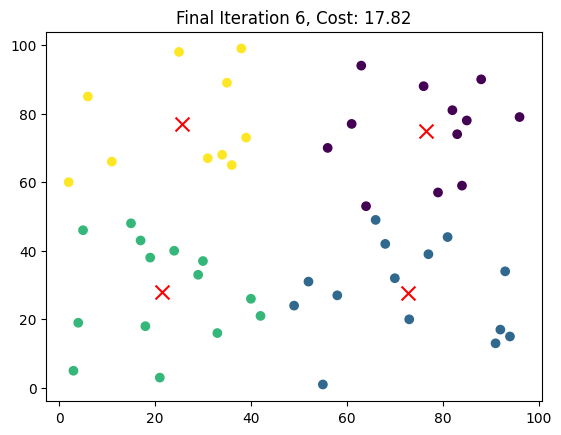

In [119]:
k_means(data, 1000)